In [2]:
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import anndata as ad
os.chdir(os.getcwd())

# Load raw data

In [3]:
adata.layers['cellbender']

<45268x60721 sparse matrix of type '<class 'numpy.float64'>'
	with 17639006 stored elements in Compressed Sparse Row format>

In [26]:
#adata=sc.read_h5ad('../data/prelim_analysis.h5ad')

## Read metadata
metadata=pd.read_excel('/data/gpfs/projects/punim2121/Atherosclerosis/data/Sample_Names_050823.xlsx',
                        sheet_name='metadata',index_col=0) 
metadata['batch']=metadata['batch'].astype(str) 

## Create list of sample names
sample_names=(metadata['patient']+'_'+metadata['condition']).values.tolist()



base_dir='/data/gpfs/projects/punim2121/Atherosclerosis/aligned_data'

adata_dict={}
for ref_genome in os.listdir('../../data/cellbender_output'):
    l=[]
    if not ref_genome.startswith('.'):
        for batch in ['Batch1','Batch2','Batch3','Batch4','Batch5','Batch6']: #os.listdir('../../data/cellbender_output/'+ref_genome):
            if not batch.startswith('.'):
                print(batch)
                for sample_name in sample_names:
                    

                    input_file=os.path.join('../../data/cellbender_corrected_counts','_'.join([ref_genome,batch,sample_name,'cellbender_corrected.h5ad']))
                    
                    if os.path.isfile(input_file):    
                        #input_file=os.path.join('../../data','_'.join([ref_genome,batch,'cellbender_corrected.h5ad']))
                        adata_sample=sc.read_h5ad(input_file)
                        adata_sample.obs['original_sample']=sample_name
                        adata_sample.obs_names_make_unique()
                        print(ref_genome,sample_name,adata_sample.shape[0],'cells')
                        l.append(adata_sample)

        adata=ad.concat(l)  
        adata.obs_names_make_unique()
        adata=adata[adata.obs['cell_probability']>0.5,:].copy()
        adata.X=adata.layers['cellbender']
        adata_dict[ref_genome]=adata
    

Batch1
GRCh38-p14-Gencode_v44 CAR1_D 10602 cells
Batch2
GRCh38-p14-Gencode_v44 CAR2_H 5135 cells
GRCh38-p14-Gencode_v44 CAR2_D 2788 cells
GRCh38-p14-Gencode_v44 CAR3_H 3627 cells
GRCh38-p14-Gencode_v44 CAR3_D 3349 cells
GRCh38-p14-Gencode_v44 CAR4_H 3060 cells
GRCh38-p14-Gencode_v44 CAR4_D 3140 cells
Batch3
GRCh38-p14-Gencode_v44 CAR5_H 1269 cells
GRCh38-p14-Gencode_v44 CAR5_D 2500 cells
GRCh38-p14-Gencode_v44 CAR6_H 6005 cells
GRCh38-p14-Gencode_v44 CAR6_D 3301 cells
Batch4
GRCh38-p14-Gencode_v44 CAR7_H 16044 cells
GRCh38-p14-Gencode_v44 CAR7_D 2968 cells
GRCh38-p14-Gencode_v44 CAR8_H 3802 cells
GRCh38-p14-Gencode_v44 CAR8_D 1575 cells
GRCh38-p14-Gencode_v44 CAR9_H 6954 cells
GRCh38-p14-Gencode_v44 CAR9_D 7264 cells
GRCh38-p14-Gencode_v44 CAR10_H 733 cells
GRCh38-p14-Gencode_v44 CAR10_D 407 cells
Batch5
GRCh38-p14-Gencode_v44 CAR11_H 4125 cells
GRCh38-p14-Gencode_v44 CAR12_D 1502 cells
GRCh38-p14-Gencode_v44 CAR12_H 3060 cells
GRCh38-p14-Gencode_v44 CAR13_D 91 cells
GRCh38-p14-Gencode

/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata-0.10.5.post1-py3.9.egg/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Batch1
GRCh38-p13-Gencode_v33 CAR1_D 10547 cells
Batch2
GRCh38-p13-Gencode_v33 CAR2_H 4878 cells
GRCh38-p13-Gencode_v33 CAR2_D 2817 cells
GRCh38-p13-Gencode_v33 CAR3_H 3460 cells
GRCh38-p13-Gencode_v33 CAR3_D 3374 cells
GRCh38-p13-Gencode_v33 CAR4_H 3021 cells
GRCh38-p13-Gencode_v33 CAR4_D 3259 cells
Batch3
GRCh38-p13-Gencode_v33 CAR5_H 1524 cells
GRCh38-p13-Gencode_v33 CAR5_D 2639 cells
GRCh38-p13-Gencode_v33 CAR6_H 5674 cells
GRCh38-p13-Gencode_v33 CAR6_D 3517 cells
Batch4
GRCh38-p13-Gencode_v33 CAR7_H 16178 cells
GRCh38-p13-Gencode_v33 CAR7_D 3005 cells
GRCh38-p13-Gencode_v33 CAR8_H 4010 cells
GRCh38-p13-Gencode_v33 CAR8_D 1612 cells
GRCh38-p13-Gencode_v33 CAR9_H 7025 cells
GRCh38-p13-Gencode_v33 CAR9_D 7615 cells
GRCh38-p13-Gencode_v33 CAR10_H 793 cells
GRCh38-p13-Gencode_v33 CAR10_D 460 cells
Batch5
GRCh38-p13-Gencode_v33 CAR11_D 189 cells
GRCh38-p13-Gencode_v33 CAR11_H 4807 cells
GRCh38-p13-Gencode_v33 CAR12_D 1549 cells
GRCh38-p13-Gencode_v33 CAR12_H 3382 cells
GRCh38-p13-Gencod

/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata-0.10.5.post1-py3.9.egg/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


# Normalize data

In [12]:
adata_norm_dict={}
for ref_genome,adata in adata_dict.items():
    adata_pp = adata.copy()
    sc.pp.normalize_total(adata_pp, target_sum=1e4, exclude_highly_expressed=True)
    sc.pp.log1p(adata_pp)
    print(adata_pp.uns)
    adata_norm_dict[ref_genome]=adata_pp

/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


OrderedDict([('log1p', {'base': None})])
OrderedDict([('log1p', {'base': None})])


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


# Plot RBC genes on UMAP

In [13]:
rcParams['figure.figsize']=(6,4.5)
for ref_genome,adata_pp in adata_norm_dict.items():
    sc.pp.pca(adata_pp,n_comps=30)
    sc.pp.neighbors(adata_pp, n_neighbors=15, n_pcs=30, metric='euclidean')
    sc.tl.umap(adata_pp)
    adata_norm_dict[ref_genome]=adata_pp

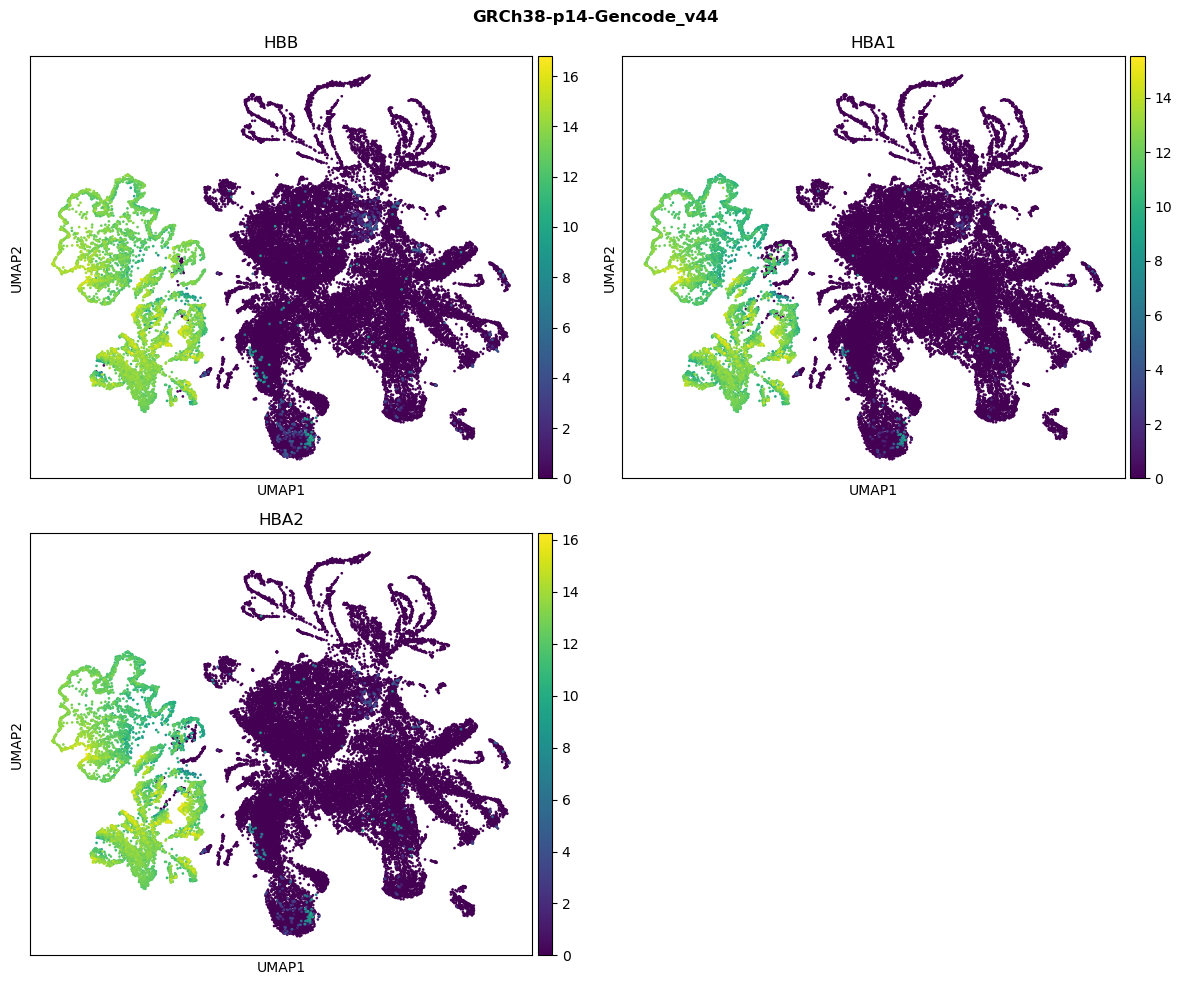

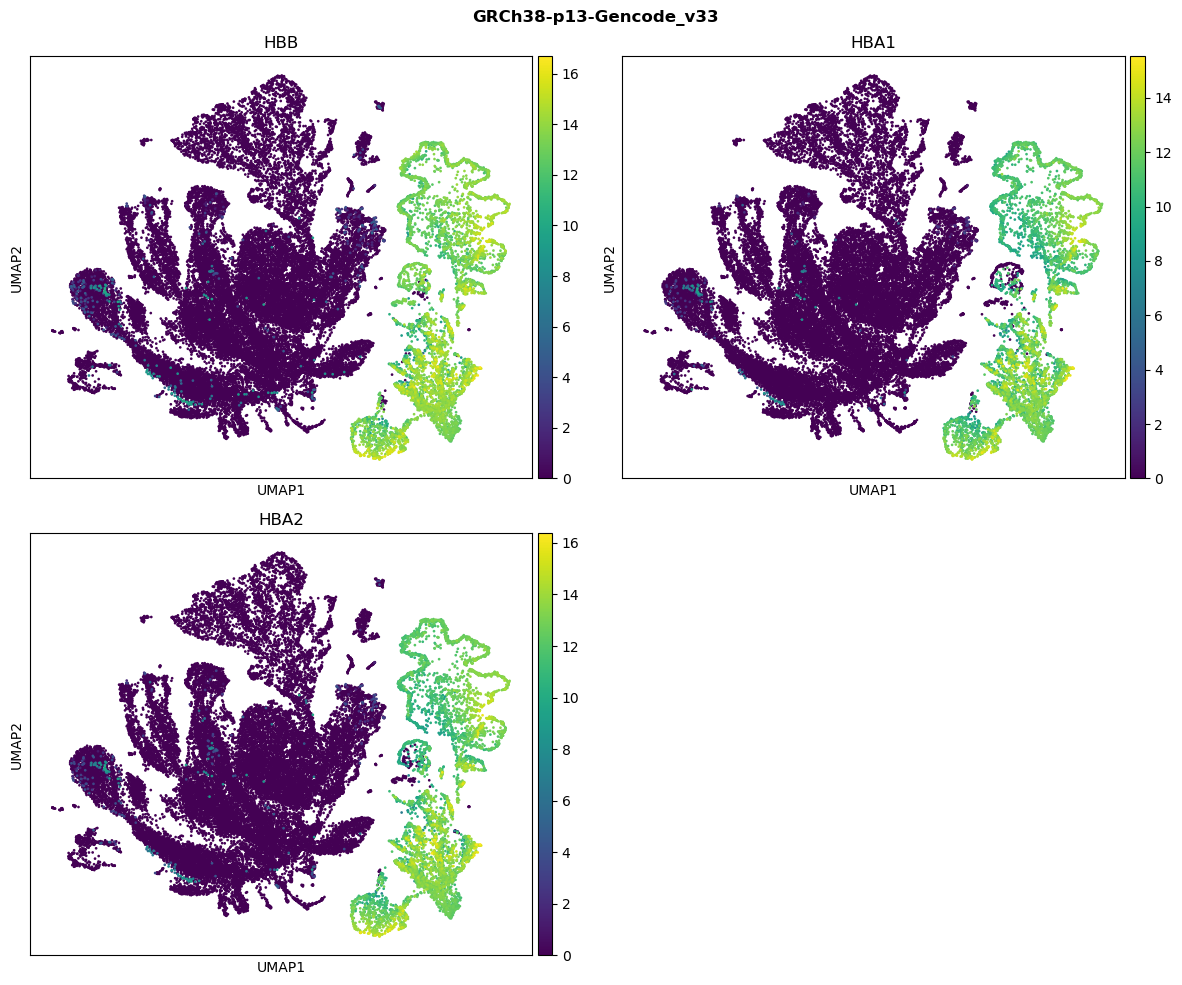

In [14]:
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ery_genes=['HBB','HBA1','HBA2']#,'HEMGN']
ncols=2
nrows=math.ceil(len(ery_genes)/ncols)

for ref_genome,adata_pp in adata_norm_dict.items():
    fig=plt.figure(figsize=(ncols*6,nrows*5))
    fig.suptitle('-'.join([ref_genome]),fontweight='bold',y=0.98)
    
    for n,col in enumerate(ery_genes):
        ax=fig.add_subplot(nrows,ncols,n+1)
        sc.pl.umap(adata_pp, color=col,show=False,size=15,ncols=2,ax=ax)
        n=n+1
    fig.tight_layout()    

# Calculate RBC_score

In [15]:
for ref_genome,adata_pp in adata_norm_dict.items():
    sc.tl.score_genes(adata_pp, gene_list=ery_genes[0:], score_name='RBC_score')
    adata_norm_dict[ref_genome]=adata_pp

# Plot RBC_score
- Select a RBC_score threshold based on RBC_ascore distribution 
- plot UMAP with low/high RBC_score
- Calculate Leiden-clusters and check which cluster corresponds to high RBC score values

/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


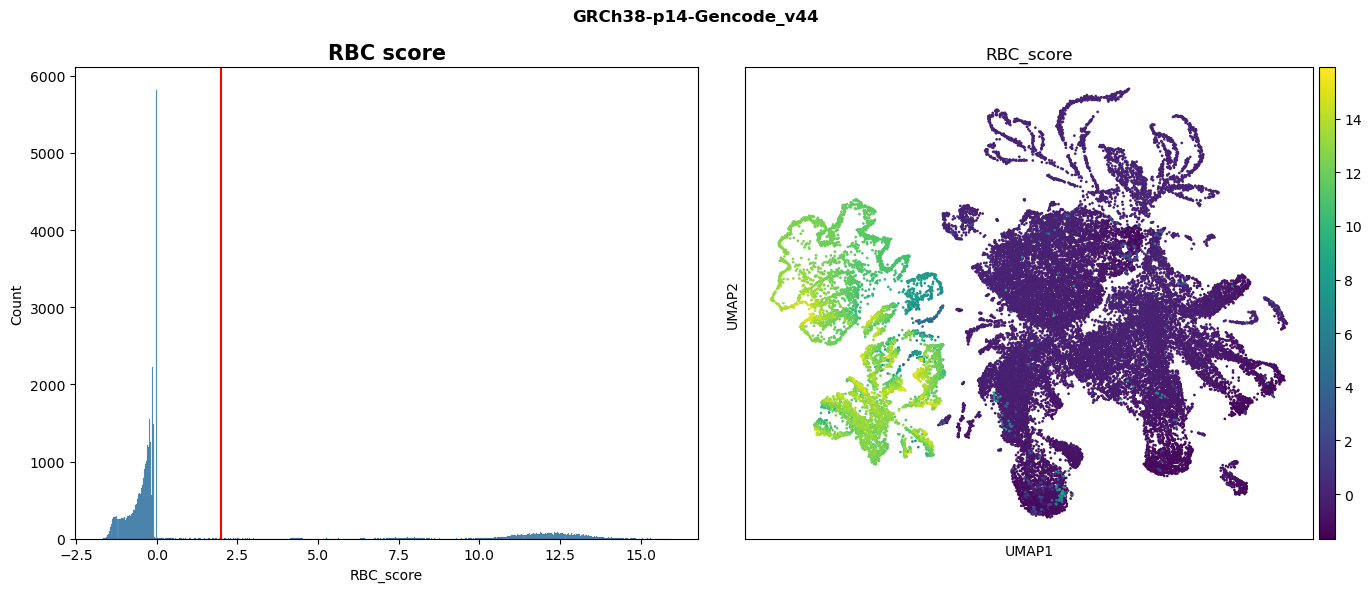

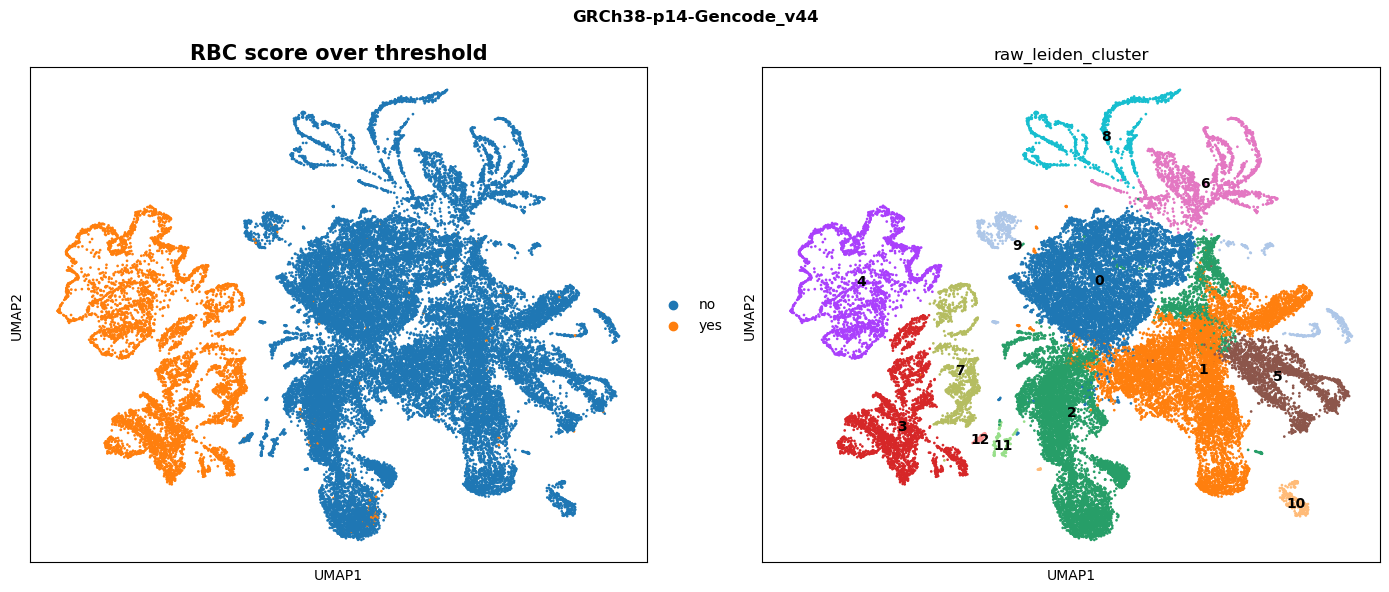

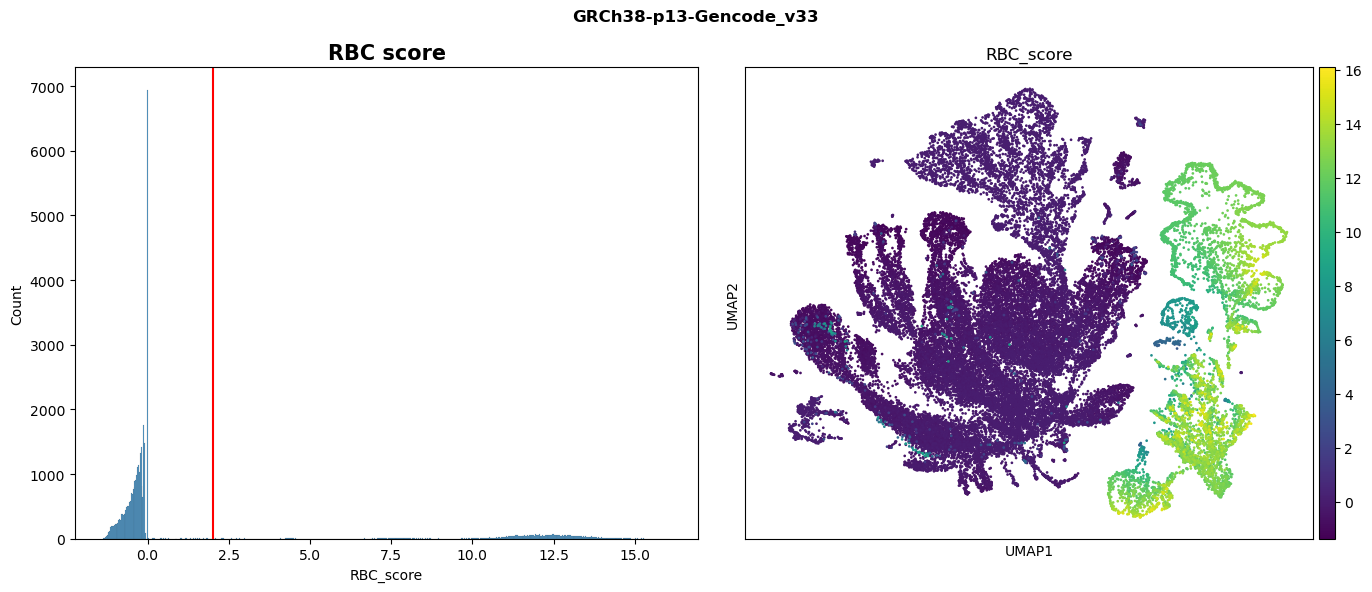

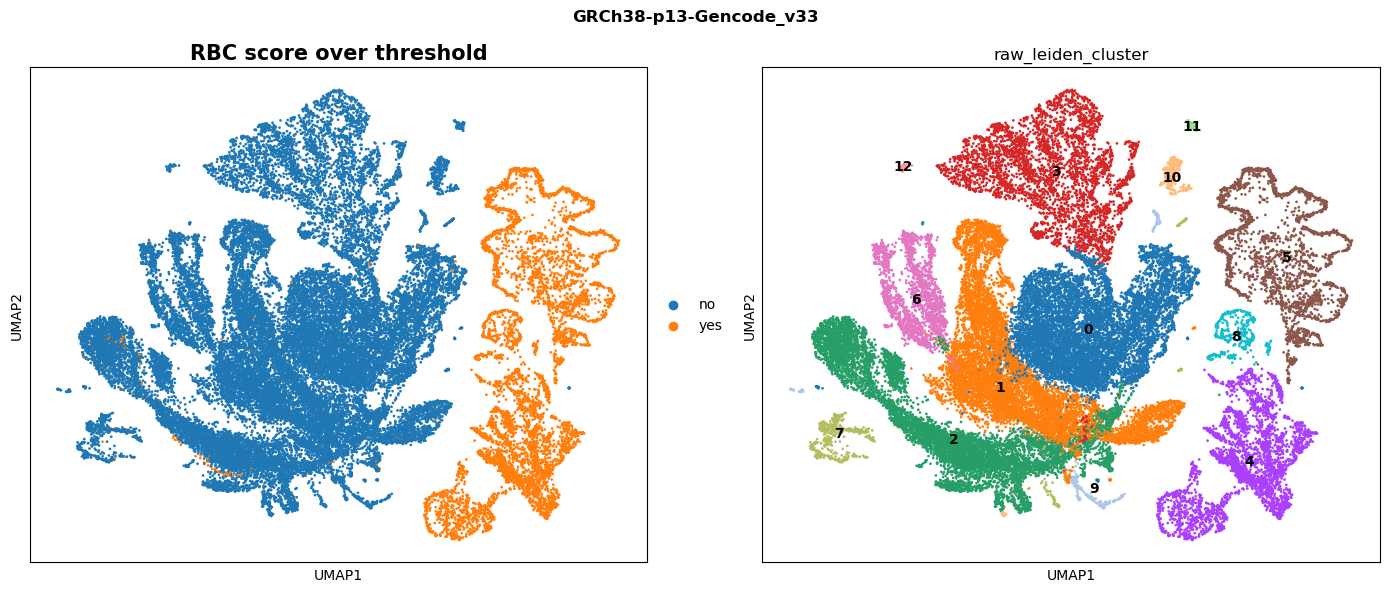

In [16]:
for ref_genome,adata_pp in adata_norm_dict.items():
    ## Select rbc score threshold
    rbc_thr=2
    adata_pp.obs['RBC_score_high']='no'
    adata_pp.obs.loc[adata_pp.obs['RBC_score']>rbc_thr,'RBC_score_high']='yes'

    fig,ax=plt.subplots(1,2,figsize=(14,6))
    sns.histplot(adata_pp.obs['RBC_score'],ax=ax[0])
    ax[0].axvline(rbc_thr,color='red')
    ax[0].set_title('RBC score',fontsize=15,fontweight='bold')
    fig.suptitle('-'.join([ref_genome]),fontweight='bold',y=0.98)
    plt.tight_layout()

    sc.pl.umap(adata_pp, color='RBC_score',show=False,size=15,ncols=2,ax=ax[1])

    fig,ax=plt.subplots(1,2,figsize=(14,6))
    sc.pl.umap(adata_pp, color='RBC_score_high',show=False,size=15,ncols=2,ax=ax[0])
    ax[0].set_title('RBC score over threshold',fontsize=15,fontweight='bold')
    fig.suptitle('-'.join([ref_genome]),fontweight='bold',y=0.98)

    #fig,ax=plt.subplots(1,1,figsize=(9,9))
    sc.tl.leiden(adata_pp, key_added='raw_leiden_cluster', resolution=0.1)
    sc.pl.umap(adata_pp, color='raw_leiden_cluster',show=False,size=15,ncols=2,ax=ax[1],legend_loc='on data')

    plt.tight_layout()

# Drop the RBCs from the raw adata and save it

In [17]:
## Filter raw adata + save it
for (ref_genome,adata_pp),adata in zip(adata_norm_dict.items(),adata_dict.values()):
    print(ref_genome)
    adata_filt=adata[adata_pp.obs['RBC_score_high']=='no',:]
    print(adata_filt)
    adata_filt.write_h5ad('../../data/'+ref_genome+'_data_RBC_removed.h5ad')

GRCh38-p14-Gencode_v44
View of AnnData object with n_obs × n_vars = 30608 × 39583
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_raw', 'n_cellbender', 'patient', 'condition', 'batch', 'ribo_frac', 'mt_frac', 'original_sample'
    obsm: 'cellbender_embedding'
    layers: 'cellbender', 'raw'


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata-0.10.5.post1-py3.9.egg/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


GRCh38-p13-Gencode_v33
View of AnnData object with n_obs × n_vars = 31971 × 60721
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_raw', 'n_cellbender', 'patient', 'condition', 'batch', 'ribo_frac', 'mt_frac', 'original_sample'
    obsm: 'cellbender_embedding'
    layers: 'cellbender', 'raw'


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata-0.10.5.post1-py3.9.egg/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
